# Shortest Path Problem

### Imports 

In [1]:
import math
import numpy as np
from graphviz import Digraph

### Utilities to draw graphs 

In [48]:
def get_graph_img_from_adjacency_matrix(graph_matrix):
    n_nodes = len(graph_matrix)
    dot = Digraph()

    for i in range(n_nodes):
        dot.node(str(i))

    for i in range(n_nodes):
        for j in range(n_nodes):
            if np.isfinite(graph_matrix[i][j]):
                dot.edge(str(i), str(j), str(graph_matrix[i][j]))
    
    return dot

def get_graph_img_from_adjacency_list(graph_list):
    n_nodes = len(graph_matrix)
    dot = Digraph()

    for i in range(n_nodes):
        dot.node(str(i))

    for i in range(n_nodes):
        for adj_node, edge_cost in graph_list[i]:
            dot.edge(str(i), str(adj_node), str(edge_cost))
    
    return dot

def get_graph_img_from_edges_list(n_nodes, edges_list):
    dot = Digraph()

    for i in range(n_nodes):
        dot.node(str(i))

    for edge in edges_list:
        start, destination, cost = edge
        dot.edge(str(start), str(destination), str(cost))
    
    return dot

## Graphs

### Graph with no negative edge

In [49]:
n_nodes = 10

# List of tuples (start, destination, cost) which represent directed edges
non_negative_edges_list = [
    (0, 1, 2),
    (0, 2, 10),
    (0, 3, 7),
    (1, 5, 4),
    (2, 3, 2),
    (2, 4, 3),
    (4, 0, 5),
    (5, 3, 1),
    (7, 8, 3),
    (8, 9, 4),
    ]

# Adjacency list representation of a graph of n_nodes nodes
# non_negative_graph_list[i] contains a list of tuple (adj_node, cost) for all adjacent nodes of i
non_negative_graph_list = [[] for _ in range(n_nodes)] 

for edge in non_negative_edges_list:
    start, destination, cost = edge
    non_negative_graph_list[start].append((destination, cost))

#### Solution 

In [50]:
# List of tuples (start, destination, shortest_path_cost) which represent directed edges
non_negative_solution_list = [
    (0, 1, 2),
    (0, 5, 6),
    (0, 3, 7),
    (0, 8, np.inf),
    (4, 1, 7),
    ]

#### Draw Graph

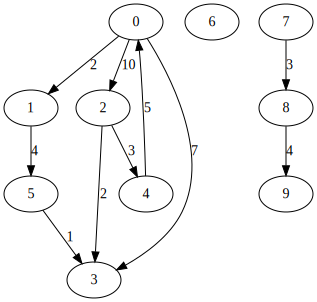

In [51]:
img = get_graph_img_from_adjacency_list(non_negative_graph_list)
img

### Graph with negative edges

In [52]:
n_nodes = 10

# List of tuples (start, destination, cost) which represent directed edges
edges_list = [
    (0, 1, 2),
    (0, 2, 10),
    (0, 3, 7),
    (1, 5, 4),
    (2, 3, -4),
    (2, 4, 3),
    (4, 0, -5),
    (5, 3, 1),
    (7, 8, 3),
    (8, 9, 4),
    ]

# Adjacency matrix representation of a graph of n_nodes nodes
# Initialize all values to infinite
graph_matrix = np.full((n_nodes, n_nodes), np.inf) 
# Values in the diagonal are 0: going from any node to itself has no cost
np.fill_diagonal(graph_matrix, 0)

for edge in edges_list:
    start, destination, cost = edge
    graph_matrix[start, destination] = cost

#### Solution 

In [53]:
# List of tuples (start, destination, shortest_path_cost) which represent directed edges
solution_list = [
    (0, 1, 2),
    (0, 5, 6),
    (0, 3, 6),
    (0, 8, np.inf),
    (4, 1, -3),
    ]

#### Draw Graph

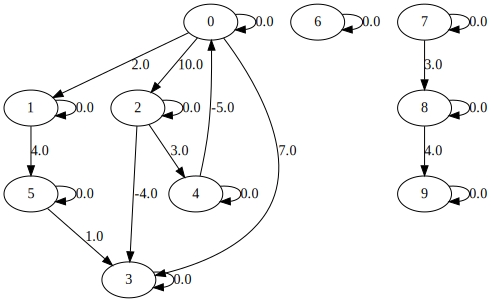

In [54]:
img = get_graph_img_from_adjacency_matrix(graph_matrix)
img

## Single-Source Shortest Paths

### Dijkstra Algorithm

In [36]:
"""
    Takes an adjacency list representing a graph and a starting node 'start',
    and returns a list 'sp' where sp[i] indicates the shortest path cost
    from start to i.
        Greedy algorithm which always chooses the closest node from the fringe.
        Once a node has been extracted from the fringe, then it's sp from the origin
    has already been computed.
"""
def dijkstra(graph, start):
    n_nodes = len(graph)
    # Array containing the shortest path costs initialized to infinity, apart from start itself which is 0
    sp = np.full(n_nodes, np.inf)
    sp[start] = 0
    
    # Min-priority queue representing the fringe of nodes. Contains tuples (distance_from_start, node)
    fringe = [(sp[start], start)]
    
    while fringe:
        _, node = heapq.heappop(fringe)
        
        for adj_node, edge_cost in graph[node]:
            if sp[adj_node] > sp[node] + edge_cost:
                sp[adj_node] = sp[node] + edge_cost
                heapq.heappush(fringe, (sp[adj_node], adj_node))
    
    return sp


#### Testing 

In [38]:
sp = dijkstra(non_negative_graph_list)

for sp in solution_list:
    start, destination, cost = sp
    assert sp_matrix[start, destination] == cost 

## All Pairs Shorterst Paths

### Floyd Warshall Algorithm

In [37]:
"""
    Takes an adjacency matrix representing a graph and returns a new matrix
    with matrix[i, j] containg the shortest path between node i and node j.
"""
def floyd_warshall(graph_matrix):
    g = graph_matrix[:][:]
    n_nodes = len(g)
    floyd_warshall_helper(g, n_nodes - 1)
    
    return g

""" 
    Takes a matrix representing a graph and modifies that matrix
    so that at the end of the function graph[i, j] contains the shortest path between
    node i and node j using only nodes in the set {0,1, .., k} as intermediary nodes, 
    which we will call sp(i, j, k).
      We have sp(i, j, k) = min(sp(i, j, k - 1), sp(i, k, k - 1) + sp(k, j, k - 1)).
    This is saying that the shortest path from i to j using nodes {0, 1, .., k} is 
    the minimum between going from i to j using only nodes {0,1, .., k - 1}, and the
    sum of first going from i to k and then from j to k (both steps still with nodes {0,1, .., k - 1}).
"""
def floyd_warshall_helper(graph, k):
    if k == -1:
        # No intermediary node, leave the original adjacency matrix unchanged
        return
    
    # Run recursively
    floyd_warshall_helper(graph, k - 1)
    # Now graph[i][j] contains the shortest path using node {0, 1, .., k - 1} as intermediary
    
    n_nodes = len(graph)
    # Update distance to get from i to j, for every i and j
    for i in range(n_nodes):
        for j in range(n_nodes):
            graph[i][j] = min(graph[i][j], graph[i][k] + graph[k][j])

#### Testing 

In [38]:
sp_matrix = floyd_warshall(graph_matrix)

for sp in solution_list:
    start, destination, cost = sp
    assert sp_matrix[start, destination] == cost 

#### Complexity Analysis 

Let $n$ be the number of nodes in the graph. Floyd Warshall algorithms runs in $\mathcal{O}(n^3)$.